# FEATURE ENGINEERING AND MODEL PREPARATION

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans

## Load Data

In [2]:
# Load the DataFrame from the CSV file
books_df = pd.read_csv('books_df_eda.csv')

## Check Data

In [3]:
books_df.head()

,author,image_url,url,pages,rating,reviews,title,total_ratings,genre,description
0,Laurence M. Hauptman,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/1001053.Betwee...,261,3.52,5,Between Two Fires: American Indians in the Civ...,33,nonfiction,Reveals that several hundred thousand Indians ...
1,"Charlotte Fiell,Emmanuelle Dirix",https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41,nonfiction,Fashion Sourcebook is the first book in a bran...
2,Andy Anderson,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26,history,The seminal history and analysis of the Hungar...
3,Carlotta R. Anderson,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6,history,AllAmerican Anarchist chronicles the life and ...
4,Jeffrey Pfeffer,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/1001090.The_Hu...,368,3.73,7,The Human Equation: Building Profits by Puttin...,119,nonfiction,Why is common sense so uncommon when it comes ...


In [4]:
books_df.tail()

,author,image_url,url,pages,rating,reviews,title,total_ratings,genre,description
73714,Philip Hoare,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/17320067-the-s...,350,3.77,74,The Sea Inside,497,nonfiction,A startling new book his most personal to date...
73715,Sarah Lean,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/17320079-a-hor...,288,3.97,94,A Horse for Angel,535,fiction,Sometimes when things are broken you cant fix ...
73716,C. John Miller,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/173203.A_Faith...,160,4.27,20,A Faith Worth Sharing: A Lifetime of Conversat...,122,nonfiction,In these warm reflections on his own growth as...
73717,Albert Marrin,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/17320669-a-vol...,256,3.63,51,A Volcano Beneath the Snow: John Brown's War A...,156,nonfiction,John Brown is a man of many legacies from hero...
73718,Marc E. Fitch,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/17320689-paran...,398,3.83,3,"Paranormal Nation: Why America Needs Ghosts, U...",12,nonfiction,Did you know that interest in UFO research inc...


In [5]:
books_df.columns

Index(['author', 'image_url', 'url', 'pages', 'rating', 'reviews', 'title',
       'total_ratings', 'genre', 'description'],
      dtype='object')

## To create a book recommender system using clustering, I will follow these steps:

#### 1. Sentiment Analysis of Descriptions:
   - I'll start by performing sentiment analysis on the book descriptions. Sentiment analysis will give a polarity score (how positive or negative the text is) and a subjectivity score (how subjective or opinionated the text is).

#### 2. Feature Engineering:
   - Besides sentiment analysis, I need to convert the 'genre' categorical data into numerical data using techniques like One-Hot Encoding.
   - Normalize numerical features like 'pages' and 'rating' to ensure that no single feature dominates the distance calculations in clustering due to scale.

#### 3. Feature Selection Justification:
   - **'description' (after sentiment analysis):** Descriptions often convey the mood and tone of the book, which can resonate with readers' preferences.
   - **'genre':** Readers typically have genre preferences, making this a strong feature for grouping similar books.
   - **'pages':** The length of a book can affect reader preference—some may prefer lengthy, detailed narratives, while others might favor shorter reads.
   - **'rating':** Indicates the quality or popularity of a book, which can influence a reader's choice.
   - 'total_ratings': Reflects the level of engagement and popularity among a wider audience. But I finally exclude it because this information is not always readily available for every book, especially newer or less popular ones so I will recommend books based on content similarity rather than popularity and total_ratings may not be necessary.

#### 4. Clustering:
   - I use a clustering algorithm like K-Means to group the books into clusters based on the features mentioned.
   - Determine the optimal number of clusters using methods like the Elbow Method.

#### 5. Model Training and Evaluation:
   - Train my clustering model on the dataset.
   - Evaluate the clusters formed using metrics like silhouette score or by qualitatively assessing the homogeneity of clusters.

#### 6. Recommendation Logic:
   - Once I have the clusters, I can recommend books from the same cluster based on a book a user likes or has interacted with taking an input from the user.

## Sentiment Analysis of Descriptions

In [6]:
# Function to handle non-string data and NaN values
def get_sentiment(text):
    # Convert all non-string values to strings and handle NaN
    if pd.isna(text):
        return None, None  # Alternatively return 0, 0, or some other neutral value
    try:
        blob = TextBlob(str(text))
        return blob.sentiment.polarity, blob.sentiment.subjectivity
    except TypeError:
        return None, None  

# Apply the function to the DataFrame and handle NaN values appropriately
books_df = books_df.dropna(subset=['description'])  # Drop rows where 'description' is NaN
books_df['polarity'], books_df['subjectivity'] = zip(*books_df['description'].apply(get_sentiment))

In [7]:
# Check
books_df.head()

,author,image_url,url,pages,rating,reviews,title,total_ratings,genre,description,polarity,subjectivity
0,Laurence M. Hauptman,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/1001053.Betwee...,261,3.52,5,Between Two Fires: American Indians in the Civ...,33,nonfiction,Reveals that several hundred thousand Indians ...,0.000000,0.178571
1,"Charlotte Fiell,Emmanuelle Dirix",https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41,nonfiction,Fashion Sourcebook is the first book in a bran...,0.302679,0.548810
2,Andy Anderson,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26,history,The seminal history and analysis of the Hungar...,0.365714,0.474286
3,Carlotta R. Anderson,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6,history,AllAmerican Anarchist chronicles the life and ...,0.138975,0.375678
4,Jeffrey Pfeffer,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/1001090.The_Hu...,368,3.73,7,The Human Equation: Building Profits by Puttin...,119,nonfiction,Why is common sense so uncommon when it comes ...,0.278547,0.559215


In [8]:
# Check some polarity values
books_df["polarity"].unique()

array([0.        , 0.30267857, 0.36571429, ..., 0.62954545, 0.05207219,
       0.04542125])

In [9]:
books_df["polarity"].dtype

dtype('float64')

In [10]:
# Check some subjectivity values
books_df["subjectivity"].unique()

array([0.17857143, 0.54880952, 0.47428571, ..., 0.48852496, 0.62985348,
       0.49035409])

In [11]:
books_df["subjectivity"].dtype

dtype('float64')

- **Neutral sentiment** might represent books with a balanced or informative tone without intense emotional fluctuations.
- **Positive sentiment** could indicate books with uplifting, inspiring, or otherwise positive content.
- **Negative sentiment** might be used for books with darker, more tragic, or intense themes.

In sentiment analysis, polarity refers to the emotion expressed in the text, ranging from negative (-1) to positive (+1). A score of 0 typically indicates neutrality. Subjectivity, on the other hand, ranges from 0 to 1, where 0 is very objective (facts) and 1 is very subjective (opinion).

The values we see suggest a mix of neutral and positive sentiments with varying degrees of subjectivity. Neutral sentiments (polarity close to 0) don't necessarily indicate a lack of emotion but rather an absence of strongly positive or negative language.

## Feature Engineering

**Brief Justification:**

Choosing these features for clustering makes sense because they capture both the content and the reception of the books. The sentiment of the description provides a numerical representation of the book's tone, which can affect a reader's interest. The genre is a fundamental aspect of reader preference, as most readers tend to like books from specific genres. The number of pages can be a deciding factor for readers who have time constraints or specific reading habits. Finally, ratings reflect the book's reception, which often influences potential readers. By using these features, the clustering model aims to group books that are likely to appeal to similar reader tastes and preferences.

### Create a features_df 

In [12]:
# Select the desired columns from books_df
selected_columns = ['genre', 'pages', 'rating', 'polarity', 'subjectivity']

# Create the features_df by selecting the columns from books_df
features_df = books_df[selected_columns]

In [13]:
# Check
features_df.head()

,genre,pages,rating,polarity,subjectivity
0,nonfiction,261,3.52,0.000000,0.178571
1,nonfiction,576,4.51,0.302679,0.548810
2,history,124,4.15,0.365714,0.474286
3,history,324,3.83,0.138975,0.375678
4,nonfiction,368,3.73,0.278547,0.559215


In [14]:
# Check Null values
features_df.isnull().sum()

genre           0
pages           0
rating          0
polarity        0
subjectivity    0
dtype: int64

### Split categoricals and numericals

In [15]:
# Separate numeric and categorical columns
numeric_columns = features_df.select_dtypes(include=['number'])
categorical_columns = features_df.select_dtypes(exclude=['number'])

In [16]:
numeric_columns

,pages,rating,polarity,subjectivity
0,261,3.52,0.000000,0.178571
1,576,4.51,0.302679,0.548810
2,124,4.15,0.365714,0.474286
3,324,3.83,0.138975,0.375678
4,368,3.73,0.278547,0.559215
...,...,...,...,...
73714,350,3.77,0.052072,0.488525
73715,288,3.97,0.045421,0.629853
73716,160,4.27,0.475000,0.800000
73717,256,3.63,0.064286,0.490354


In [17]:
# Statistic description
numeric_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
pages,73038.0,272.647006,103.566166,50.0,206.000000,261.000000,330.000000,596.0
rating,73038.0,3.897740,0.365534,0.0,3.700000,3.920000,4.130000,5.0
polarity,73038.0,0.137226,0.155951,-1.0,0.040385,0.136111,0.226789,1.0
subjectivity,73038.0,0.479524,0.173167,0.0,0.400000,0.495517,0.582837,1.0


In [18]:
categorical_columns

,genre
0,nonfiction
1,nonfiction
2,history
3,history
4,nonfiction
...,...
73714,nonfiction
73715,fiction
73716,nonfiction
73717,nonfiction


### Encoding categorical

In [19]:
# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Fit and transform the categorical columns
encoded_categorical = encoder.fit_transform(categorical_columns)

# Get the column names for the encoded categorical data
encoded_column_names = encoder.get_feature_names_out(input_features=categorical_columns.columns)

# Create a DataFrame with the encoded categorical data and column names
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoded_column_names)

/Users/mac/anaconda3/envs/nahuelito/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [20]:
encoded_categorical_df

,genre_fantasy,genre_fiction,genre_history,genre_nonfiction,genre_other,genre_romance
0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
73033,0.0,0.0,0.0,1.0,0.0,0.0
73034,0.0,1.0,0.0,0.0,0.0,0.0
73035,0.0,0.0,0.0,1.0,0.0,0.0
73036,0.0,0.0,0.0,1.0,0.0,0.0


### Scaling numericals

In [21]:
# Fit the scaler and transform the data
scaler_instance = StandardScaler()
scaled_data = scaler_instance.fit_transform(numeric_columns[['pages', 'rating']])
numeric_columns[['pages', 'rating']] = scaled_data

In [22]:
scaler_instance

StandardScaler()

In [23]:
# Check scaled numerical features
numeric_columns

,pages,rating,polarity,subjectivity
0,-0.112460,-1.033400,0.000000,0.178571
1,2.929094,1.674988,0.302679,0.548810
2,-1.435295,0.690119,0.365714,0.474286
3,0.495851,-0.185319,0.138975,0.375678
4,0.920703,-0.458893,0.278547,0.559215
...,...,...,...,...
73714,0.746900,-0.349463,0.052072,0.488525
73715,0.148244,0.197685,0.045421,0.629853
73716,-1.087689,1.018409,0.475000,0.800000
73717,-0.160739,-0.732468,0.064286,0.490354


The decision to normalize certain features but not others often depends on the range of values those features can take and how we intend to interpret them within my model.

**For features 'pages' and 'rating':**

- These are quantitative features that can vary over a wide range and are directly comparable in terms of scale and units. Normalizing these ensures that each feature contributes equally to the distance computations in the clustering algorithm.

**For 'polarity' and 'subjectivity' obtained from sentiment analysis:**

- These values are already within a bounded range. Polarity is typically between -1 and 1, and subjectivity is between 0 and 1. They are ratios or percentages that represent the sentiment of the text. Scaling them might not be necessary because they are already on a comparable scale.

### Concat encoded and scaled features

In [24]:
# Reset indexes of numeric_columns and encoded_categorical_df
numeric_columns = numeric_columns.reset_index(drop=True)
encoded_categorical_df = encoded_categorical_df.reset_index(drop=True)

# Concatenate the encoded categorical data with the numeric columns
final_features_df = pd.concat([numeric_columns, encoded_categorical_df], axis=1)

In [25]:
# Check the merged data
final_features_df

,pages,rating,polarity,subjectivity,genre_fantasy,genre_fiction,genre_history,genre_nonfiction,genre_other,genre_romance
0,-0.112460,-1.033400,0.000000,0.178571,0.0,0.0,0.0,1.0,0.0,0.0
1,2.929094,1.674988,0.302679,0.548810,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.435295,0.690119,0.365714,0.474286,0.0,0.0,1.0,0.0,0.0,0.0
3,0.495851,-0.185319,0.138975,0.375678,0.0,0.0,1.0,0.0,0.0,0.0
4,0.920703,-0.458893,0.278547,0.559215,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
73033,0.746900,-0.349463,0.052072,0.488525,0.0,0.0,0.0,1.0,0.0,0.0
73034,0.148244,0.197685,0.045421,0.629853,0.0,1.0,0.0,0.0,0.0,0.0
73035,-1.087689,1.018409,0.475000,0.800000,0.0,0.0,0.0,1.0,0.0,0.0
73036,-0.160739,-0.732468,0.064286,0.490354,0.0,0.0,0.0,1.0,0.0,0.0


In [26]:
final_features_df.columns

Index(['pages', 'rating', 'polarity', 'subjectivity', 'genre_fantasy',
       'genre_fiction', 'genre_history', 'genre_nonfiction', 'genre_other',
       'genre_romance'],
      dtype='object')

In [27]:
books_df.columns

Index(['author', 'image_url', 'url', 'pages', 'rating', 'reviews', 'title',
       'total_ratings', 'genre', 'description', 'polarity', 'subjectivity'],
      dtype='object')

### Prepare the final features DataFrame for clustering

In [28]:
# Reset indexes of both DataFrames
final_features_df.reset_index(drop=True, inplace=True)
books_df.reset_index(drop=True, inplace=True)

# Select the columns to merge and merge DataFrames
model_df = final_features_df.merge(
    books_df[['author', 'image_url', 'url', 'title']], left_index=True, right_index=True, how='inner')

In [29]:
# Check the prepared DataFrame that I will use for the model
model_df

,pages,rating,polarity,subjectivity,genre_fantasy,genre_fiction,genre_history,genre_nonfiction,genre_other,genre_romance,author,image_url,url,title
0,-0.112460,-1.033400,0.000000,0.178571,0.0,0.0,0.0,1.0,0.0,0.0,Laurence M. Hauptman,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/1001053.Betwee...,Between Two Fires: American Indians in the Civ...
1,2.929094,1.674988,0.302679,0.548810,0.0,0.0,0.0,1.0,0.0,0.0,"Charlotte Fiell,Emmanuelle Dirix",https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/10010552-fashi...,Fashion Sourcebook 1920s
2,-1.435295,0.690119,0.365714,0.474286,0.0,0.0,1.0,0.0,0.0,0.0,Andy Anderson,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/1001077.Hungar...,Hungary 56
3,0.495851,-0.185319,0.138975,0.375678,0.0,0.0,1.0,0.0,0.0,0.0,Carlotta R. Anderson,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/1001079.All_Am...,All-American Anarchist: Joseph A. Labadie and ...
4,0.920703,-0.458893,0.278547,0.559215,0.0,0.0,0.0,1.0,0.0,0.0,Jeffrey Pfeffer,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/1001090.The_Hu...,The Human Equation: Building Profits by Puttin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73033,0.746900,-0.349463,0.052072,0.488525,0.0,0.0,0.0,1.0,0.0,0.0,Philip Hoare,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/17320067-the-s...,The Sea Inside
73034,0.148244,0.197685,0.045421,0.629853,0.0,1.0,0.0,0.0,0.0,0.0,Sarah Lean,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/17320079-a-hor...,A Horse for Angel
73035,-1.087689,1.018409,0.475000,0.800000,0.0,0.0,0.0,1.0,0.0,0.0,C. John Miller,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/173203.A_Faith...,A Faith Worth Sharing: A Lifetime of Conversat...
73036,-0.160739,-0.732468,0.064286,0.490354,0.0,0.0,0.0,1.0,0.0,0.0,Albert Marrin,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/17320669-a-vol...,A Volcano Beneath the Snow: John Brown's War A...


In [30]:
# Rename the genre encoded columns
model_df.rename(columns={
    'genre_fantasy': 'fantasy',
    'genre_fiction': 'fiction',
    'genre_history': 'history',
    'genre_nonfiction': 'nonfiction',
    'genre_other': 'other',
    'genre_romance': 'romance'
}, inplace=True)

In [31]:
model_df.head()

,pages,rating,polarity,subjectivity,fantasy,fiction,history,nonfiction,other,romance,author,image_url,url,title
0,-0.112460,-1.033400,0.000000,0.178571,0.0,0.0,0.0,1.0,0.0,0.0,Laurence M. Hauptman,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/1001053.Betwee...,Between Two Fires: American Indians in the Civ...
1,2.929094,1.674988,0.302679,0.548810,0.0,0.0,0.0,1.0,0.0,0.0,"Charlotte Fiell,Emmanuelle Dirix",https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/10010552-fashi...,Fashion Sourcebook 1920s
2,-1.435295,0.690119,0.365714,0.474286,0.0,0.0,1.0,0.0,0.0,0.0,Andy Anderson,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/1001077.Hungar...,Hungary 56
3,0.495851,-0.185319,0.138975,0.375678,0.0,0.0,1.0,0.0,0.0,0.0,Carlotta R. Anderson,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/1001079.All_Am...,All-American Anarchist: Joseph A. Labadie and ...
4,0.920703,-0.458893,0.278547,0.559215,0.0,0.0,0.0,1.0,0.0,0.0,Jeffrey Pfeffer,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/1001090.The_Hu...,The Human Equation: Building Profits by Puttin...


## Clustering

First, I will choose the Optimal Number of Clusters that is where the elbow occurs. This would be visually determined from the plot generated in next steps.

### Determine the optimal number of clusters (k)

### Elbow Method

To determine the optimal number of clusters for K-means clustering, the Elbow Method is a common technique used in cluster analysis. The method consists of plotting the explained variance as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

**Explanation of the code:**

- We use `.values` to get the NumPy array from the DataFrame, which is the input format expected by `scikit-learn` algorithms.
- We use a loop to fit the KMeans algorithm to our data for a range of cluster numbers (from 2 to 20) that want to evaluate, and visually inspect the plot to determine the "elbow" point.
- `kmeans.inertia_` gives us the sum of squared distances, which we will use to determine the elbow.
- We plot these values using `matplotlib` to visualize the elbow curve.
- The point where the SSD starts to flatten out and forming an "elbow" is generally considered as the indicator of the optimal number of clusters.

"Elbow" point: This is where the sum of squared distances starts to decrease more slowly, indicating that adding more clusters does not significantly improve the fit.

In [33]:
# Extract the clustering features
X = model_df[['pages', 'rating', 'polarity', 'subjectivity', 
              'fantasy', 'fiction', 'history', 'nonfiction', 'other', 'romance']].values

In [34]:
# Calculate the sum of squared distances
ssd = []
for num_clusters in range(2, 20):  # Range from 2 to 20 clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)  # Inertia: Sum of squared distances of samples to their closest cluster center

/Users/mac/anaconda3/envs/nahuelito/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mac/anaconda3/envs/nahuelito/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mac/anaconda3/envs/nahuelito/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mac/anaconda3/envs/nahuelito/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: 

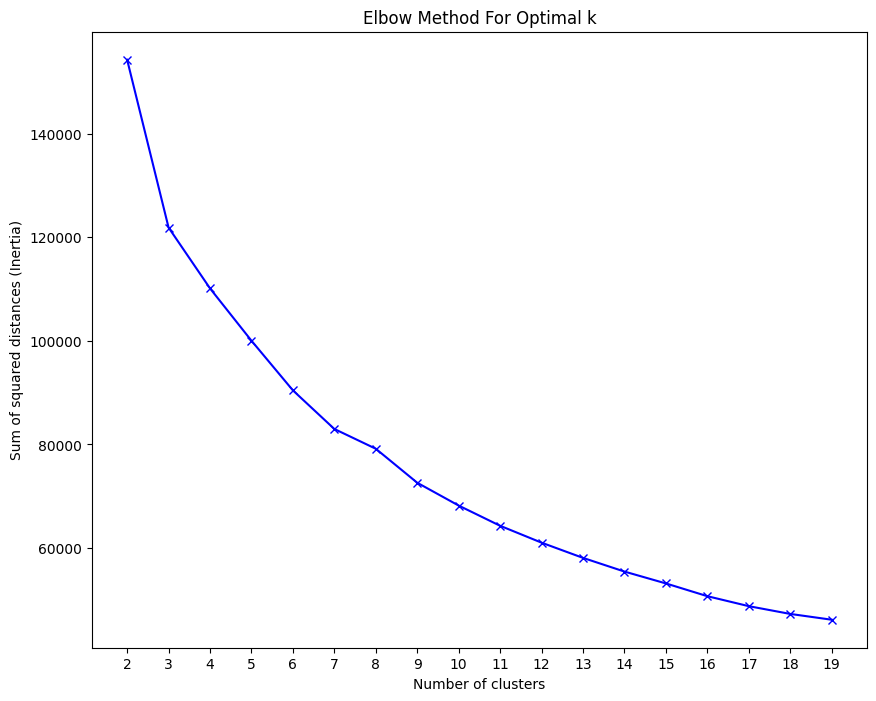

In [35]:
# Plot the Elbow Curve
plt.figure(figsize=(10, 8))
plt.plot(range(2, 20), ssd, 'bx-')  # Range from 2 to 20
plt.xticks(np.arange(2, 20, 1))  # Set x-axis ticks from 2 to 19 with an interval of 1
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.show()

The graph displays a continuous decrease in inertia as the number of clusters increases, which is typical since more clusters will always reduce the distance from each point to the center of its cluster. However, the rate of decrease slows down, and we're looking for the point where this reduction becomes less pronounced, indicating that additional clusters are not providing significant improvements in the compactness of the clusters. This point is often referred to as the "elbow."

There isn't a clear and sharp "elbow," but there appears to be a slight bend around 6 clusters. 

While there's no obvious elbow point and the optimal number of clusters isn't immediately clear, the silhouette score can be a helpful supplementary measure to determine the quality of the clusters formed. The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

If the silhouette score is used in conjunction with the elbow method, it can provide a more comprehensive view of the optimal number of clusters by considering not only the sum of squared distances but also how well-separated the clusters are.

### Silhouette Score

The Silhouette Score graph complements the Elbow Method by measuring how similar each point is to its own cluster compared to other clusters.

The reason for performing a silhouette score analysis is to ensure that the chosen number of clusters not only minimizes within-cluster variance (as the Elbow Method aims to do) but also maximizes between-cluster separation. This dual perspective helps to confirm that the clusters are meaningful and not just artifacts of the chosen clustering method.

The choice of the range from 2 to 20 is to explore a wide spectrum of potential cluster numbers to ensure that we don't prematurely exclude potentially suitable cluster solutions. In practice, the range should be wide enough to capture the point where increasing the number of clusters ceases to provide significant benefits.

**Explanation of the code:**

- We iterate from 2 to 20 clusters and calculate the silhouette score for each k.
- The `silhouette_score` function computes the mean silhouette coefficient over all samples, which we then append to the `silhouette_scores` list.
- We plot these scores, looking for the number of clusters that give the highest silhouette score.
- A higher silhouette score suggests better-defined clusters.

/Users/mac/anaconda3/envs/nahuelito/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for 2 clusters: 0.20777510636295435


/Users/mac/anaconda3/envs/nahuelito/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for 3 clusters: 0.22490444202197596


/Users/mac/anaconda3/envs/nahuelito/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for 4 clusters: 0.2155083656881859


/Users/mac/anaconda3/envs/nahuelito/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for 5 clusters: 0.1863979583671529


/Users/mac/anaconda3/envs/nahuelito/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for 6 clusters: 0.20910219620080062


/Users/mac/anaconda3/envs/nahuelito/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for 7 clusters: 0.21315792946082004


/Users/mac/anaconda3/envs/nahuelito/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for 8 clusters: 0.22280366050779135


/Users/mac/anaconda3/envs/nahuelito/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for 9 clusters: 0.23128059803942838


/Users/mac/anaconda3/envs/nahuelito/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for 10 clusters: 0.23010425049571978


/Users/mac/anaconda3/envs/nahuelito/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for 11 clusters: 0.2327189342474424


/Users/mac/anaconda3/envs/nahuelito/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for 12 clusters: 0.23303125925693607


/Users/mac/anaconda3/envs/nahuelito/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for 13 clusters: 0.23303448475462152


/Users/mac/anaconda3/envs/nahuelito/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for 14 clusters: 0.24621200695007808


/Users/mac/anaconda3/envs/nahuelito/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for 15 clusters: 0.2564461857878127


/Users/mac/anaconda3/envs/nahuelito/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for 16 clusters: 0.25725113586832987


/Users/mac/anaconda3/envs/nahuelito/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for 17 clusters: 0.25918599145746324


/Users/mac/anaconda3/envs/nahuelito/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for 18 clusters: 0.2569585817995091


/Users/mac/anaconda3/envs/nahuelito/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for 19 clusters: 0.2518793173625315


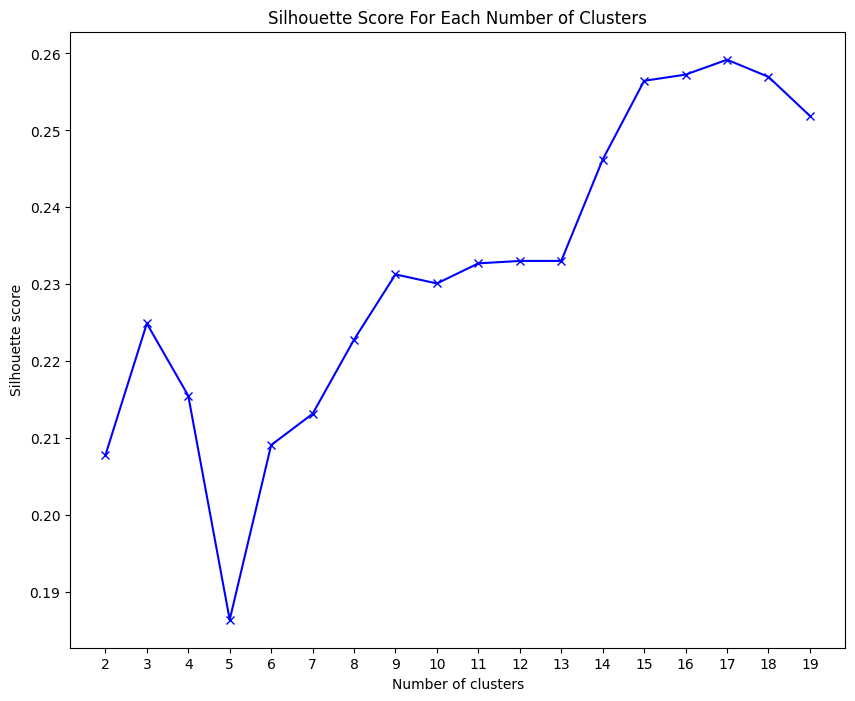

In [36]:
from sklearn.metrics import silhouette_score

# Create an empty list to store silhouette scores
silhouette_scores = []

# Loop through different numbers of clusters to evaluate clustering quality
for num_clusters in range(2, 20):  # Start from 2 clusters since silhouette score cannot be calculated for a single cluster
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    
    # Calculate silhouette score for the current number of clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    # Print the silhouette score for the current number of clusters
    print(f"Silhouette score for {num_clusters} clusters: {silhouette_avg}")

# Plot silhouette scores
plt.figure(figsize=(10, 8))
plt.plot(range(2, 20), silhouette_scores, 'bx-')
plt.xticks(np.arange(2, 20, 1))  # Set x-axis ticks from 2 to 19 with an interval of 1
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score For Each Number of Clusters')
plt.show()

Based on the silhouette score graph and my preference for more than 9 clusters, we can observe two peaks after 9: one at 13 clusters and another at 16 clusters. To determine which of these two options might be more suitable for my clustering model, I want to compare how evenly distributed the data points are within each cluster for both choices and assess the internal consistency of the clusters using standard deviation.

### Choosing/Comparing Clusters 13 and 16

I will:

1. **Fit K-Means Clustering Models**: For both 13 and 16 clusters, and assign the cluster labels to my dataset.

2. **Calculate the Size of Each Cluster**: For both cluster numbers, count the number of data points in each cluster.

3. **Calculate the Standard Deviation**: For the cluster sizes of both cluster numbers, calculate the standard deviation to assess the distribution spread. A lower standard deviation indicates a more uniform distribution of cluster sizes.

4. **Choose the Cluster Number**: Based on the lowest standard deviation, indicating a more even distribution.


**Explanation of the code:**

- The `evaluate_clusters` function clusters the data for each specified number of clusters, calculates the silhouette score for each, and assesses the distribution of cluster sizes by calculating the standard deviation.
- `cluster_info` is a dictionary that stores the standard deviation and labels for each number of clusters evaluated.
- We then select the number of clusters with the lowest standard deviation of cluster sizes.
- Finally, the optimal cluster labels are added to the original DataFrame for further use.

This process should help to determine which number of clusters leads to the most balanced distribution of data points across clusters, which can be critical for ensuring that each cluster is meaningful and significant for the recommendation system.

In [37]:
def evaluate_clusters(features, cluster_range):
    for n_clusters in cluster_range:
        # Perform K-Means clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(features)

        # Calculate silhouette score
        silhouette_avg = silhouette_score(features, labels)
        print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

        # Calculate cluster counts and standard deviation
        cluster_counts = pd.Series(labels).value_counts()
        std_dev = cluster_counts.std()
        print(f"Cluster counts for {n_clusters} clusters: {cluster_counts.values}")
        print(f"Standard deviation of cluster sizes for {n_clusters} clusters: {std_dev}\n")
        
        # Store the standard deviation and labels for further analysis
        cluster_info[n_clusters] = {'std_dev': std_dev, 'labels': labels}

# 'features' is my matrix of features for clustering
features = model_df[['pages', 'rating', 'polarity', 'subjectivity', 
                     'fantasy', 'fiction', 'history', 'nonfiction', 'other', 'romance']].values

# Initialize an empty dictionary and call the evaluate_clusters function with cluster values 13 and 16
cluster_info = {}
evaluate_clusters(features, cluster_range=[13, 16])

# Determine which number of clusters has the lowest standard deviation
optimal_n_clusters = min(cluster_info, key=lambda k: cluster_info[k]['std_dev'])
print(f"Optimal number of clusters based on standard deviation: {optimal_n_clusters}")

# Add the optimal cluster labels to the DataFrame
model_df['cluster'] = cluster_info[optimal_n_clusters]['labels']

/Users/mac/anaconda3/envs/nahuelito/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 13, the average silhouette_score is : 0.23303448475462152
Cluster counts for 13 clusters: [7960 7804 7389 7363 6611 6195 5675 5504 5260 4903 4268 4014   92]
Standard deviation of cluster sizes for 13 clusters: 2108.5466710752607



/Users/mac/anaconda3/envs/nahuelito/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 16, the average silhouette_score is : 0.25725113586832987
Cluster counts for 16 clusters: [7367 7136 6710 6296 5178 4906 4376 4334 4297 4178 3944 3827 3810 3394
 3193   92]
Standard deviation of cluster sizes for 16 clusters: 1781.8159229654823

Optimal number of clusters based on standard deviation: 16


 A lower standard deviation indicates a more evenly distributed set of clusters. Therefore, the distribution of books across the clusters is more even with **16 clusters** than with 13 clusters.

## Fit the K-Means Clustering Model

Having selected 16 clusters and given my feature set, the next steps to apply this in my clustering model are as follows:

1. **Fit the K-Means Clustering Model**: Use the K-Means algorithm to fit the model to my features with the number of clusters set to 16.

2. **Assign Cluster Labels**: Assign the resulting cluster labels to each record in the dataset.

3. **Analyze Cluster Characteristics**: For each cluster, analyze the centroid or mean value of the features to understand the characteristics of each cluster.

4. **Cluster Validation**: Validate the clusters using silhouette score or other validation methods to ensure they are well-defined and separated.

5. **Use the Clusters**: Use the assigned cluster labels for book recommendations, targeting similar books within the same cluster for recommendations.


**Explanation of the code:**

- The K-Means model is initialized with 16 clusters and fitted to the data.
- The `silhouette_score` is used to evaluate the quality of the clusters created by the model.
- The centroids of each cluster are calculated. These centroids represent the "average" book in each cluster according to the features I've selected.
- The centroids are printed out to examine. They can provide insight into what each cluster represents. For example, a cluster centroid with a high `pages` value and a high `rating` value might represent lengthy but well-received books.
- The cluster labels are assigned back to the original DataFrame and can now be used for recommending books or for further analysis.

I will end up with a DataFrame where each book is assigned to one of 16 clusters, which I can use as the basis for making recommendations or for further data exploration.

In [38]:
# Fit the K-Means clustering model with 16 clusters
kmeans = KMeans(n_clusters=16, random_state=42)
model_df['cluster'] = kmeans.fit_predict(features)

# Calculate the silhouette score to validate the clusters
silhouette_avg = silhouette_score(features, model_df['cluster'])
print(f"The average silhouette_score for 16 clusters is: {silhouette_avg}")

/Users/mac/anaconda3/envs/nahuelito/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The average silhouette_score for 16 clusters is: 0.25725113586832987


In [39]:
# Analyze cluster characteristics
# Calculate the centroids of each cluster
centroids = kmeans.cluster_centers_

# Map the centroids to their corresponding features for interpretation
feature_names = ['pages', 'rating', 'polarity', 'subjectivity', 
                 'fantasy', 'fiction', 'history', 'nonfiction', 'other', 'romance']

centroid_df = pd.DataFrame(centroids, columns=feature_names)
centroid_df

,pages,rating,polarity,subjectivity,fantasy,fiction,history,nonfiction,other,romance
0,-0.021265,0.894357,0.177007,0.472199,2.040035e-15,-5.828671e-15,1.974115e-15,1.000000e+00,8.049117e-16,2.359224e-16
1,-0.134490,-0.436155,0.157604,0.465620,2.067790e-15,-8.160139e-15,2.019218e-15,1.000000e+00,2.220446e-15,-3.469447e-17
2,-1.156329,0.330938,0.100094,0.489143,1.484923e-15,1.000000e+00,1.078998e-15,-1.720846e-14,-6.383782e-15,1.200429e-15
3,1.323883,-0.295651,0.088678,0.509597,2.431025e-02,9.025661e-01,2.257380e-02,1.543508e-03,3.723712e-02,1.157631e-02
4,-0.071466,-0.636821,0.103909,0.502626,1.984524e-15,1.000000e+00,1.880440e-15,-2.980949e-14,-2.220446e-15,8.187895e-16
5,2.242597,0.712219,0.138620,0.455367,3.045419e-02,2.236808e-01,5.434497e-02,4.736151e-01,2.013652e-01,1.601470e-02
6,-0.146367,-0.199370,0.135355,0.506162,2.264370e-01,6.106227e-16,1.468466e-01,-1.681988e-14,-6.328271e-15,4.584594e-01
7,-0.073186,-2.064995,0.131194,0.464573,4.183854e-02,2.545669e-01,4.213318e-02,2.083088e-01,2.787272e-01,1.184443e-01
8,1.091349,0.054664,0.152816,0.462852,1.080310e-02,4.274359e-15,1.100693e-02,9.741133e-01,-6.827872e-15,3.872809e-03
9,-1.356590,-1.176346,0.117886,0.472213,9.964503e-02,3.128803e-01,2.307302e-02,1.944726e-01,2.507606e-01,9.508114e-02


Interpretation of the outputs of the clustering analysis using the K-Means algorithm, including the silhouette score and the centroids of each cluster:

1. **Silhouette Score**: The silhouette score for the clustering model with 16 clusters is approximately 0.257. This value indicates a fair, albeit not strong, structure detected by the clustering process. The silhouette score ranges from -1 for incorrect clustering to +1 for highly dense clustering, with scores around zero indicating overlapping clusters. A score of 0.257 suggests that the clusters are moderately distinct from each other but not highly separated.

2. **Cluster Centroids**: The centroid of a cluster represents the mean value of each feature within that cluster. These centroids provide insight into the defining characteristics of each cluster. In the output, the centroid values are displayed for each of the 16 clusters across the features `pages`, `rating`, `polarity`, `subjectivity`, `fantasy`, `fiction`, `history`, `nonfiction`, `other`, and `romance`. The values are normalized and centered around zero, which implies that positive values are above the dataset mean for that feature and negative values are below.

3. **Interpreting Centroids**: We can interpret what each cluster represents. For example, a cluster with a high positive value for `rating` but low for other features might represent books with high ratings regardless of their genre. Conversely, a cluster with high values for a genre like `fantasy` may represent books that are strongly associated with the fantasy genre.

4. **Cluster Characteristics**: The first cluster (index 0) has a negative value for `pages` and high values for `rating` and `nonfiction`, suggesting these might be non-fiction books with fewer pages and higher ratings. The last cluster (index 15) shows high values for `pages` and `rating`, indicating longer books that are well-rated.

This is an essential part of understanding how the K-Means algorithm has grouped the books into clusters. In the future I can use these insights to further refine my clustering model or to interpret the groups in the context of my book recommendation system.

In [40]:
# Check the df with the cluster labels
model_df

,pages,rating,polarity,subjectivity,fantasy,fiction,history,nonfiction,other,romance,author,image_url,url,title,cluster
0,-0.112460,-1.033400,0.000000,0.178571,0.0,0.0,0.0,1.0,0.0,0.0,Laurence M. Hauptman,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/1001053.Betwee...,Between Two Fires: American Indians in the Civ...,1
1,2.929094,1.674988,0.302679,0.548810,0.0,0.0,0.0,1.0,0.0,0.0,"Charlotte Fiell,Emmanuelle Dirix",https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/10010552-fashi...,Fashion Sourcebook 1920s,5
2,-1.435295,0.690119,0.365714,0.474286,0.0,0.0,1.0,0.0,0.0,0.0,Andy Anderson,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/1001077.Hungar...,Hungary 56,12
3,0.495851,-0.185319,0.138975,0.375678,0.0,0.0,1.0,0.0,0.0,0.0,Carlotta R. Anderson,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/1001079.All_Am...,All-American Anarchist: Joseph A. Labadie and ...,6
4,0.920703,-0.458893,0.278547,0.559215,0.0,0.0,0.0,1.0,0.0,0.0,Jeffrey Pfeffer,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/1001090.The_Hu...,The Human Equation: Building Profits by Puttin...,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73033,0.746900,-0.349463,0.052072,0.488525,0.0,0.0,0.0,1.0,0.0,0.0,Philip Hoare,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/17320067-the-s...,The Sea Inside,8
73034,0.148244,0.197685,0.045421,0.629853,0.0,1.0,0.0,0.0,0.0,0.0,Sarah Lean,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/17320079-a-hor...,A Horse for Angel,15
73035,-1.087689,1.018409,0.475000,0.800000,0.0,0.0,0.0,1.0,0.0,0.0,C. John Miller,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/173203.A_Faith...,A Faith Worth Sharing: A Lifetime of Conversat...,10
73036,-0.160739,-0.732468,0.064286,0.490354,0.0,0.0,0.0,1.0,0.0,0.0,Albert Marrin,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/17320669-a-vol...,A Volcano Beneath the Snow: John Brown's War A...,1


## Create a DataFrame with cluster labels for the recommender

In [41]:
final_df = model_df[['title', 'author', 'image_url', 'url', 'cluster']].copy()
final_df.head()

,title,author,image_url,url,cluster
0,Between Two Fires: American Indians in the Civ...,Laurence M. Hauptman,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/1001053.Betwee...,1
1,Fashion Sourcebook 1920s,"Charlotte Fiell,Emmanuelle Dirix",https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/10010552-fashi...,5
2,Hungary 56,Andy Anderson,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/1001077.Hungar...,12
3,All-American Anarchist: Joseph A. Labadie and ...,Carlotta R. Anderson,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/1001079.All_Am...,6
4,The Human Equation: Building Profits by Puttin...,Jeffrey Pfeffer,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/1001090.The_Hu...,8


In [42]:
final_df.shape

(73038, 5)

### Save the DataFrame with cluster labels

In [43]:
# Save to a CSV file
final_df.to_csv('final_df.csv', index=False)

## Saving KMeans Model, Scaler and Encoder with Pickle

In [44]:
import pickle

In [45]:
# Check the shape of the KMeans cluster centers
print(kmeans.cluster_centers_.shape)

(16, 10)


In [46]:
# Save the KMeans model
with open('kmeans.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

# Save the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler_instance, file)
    
# Save the encoder
with open('encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

## Use the cluster labels in my recommendation system

In the next notebook, I would integrate the cluster labels into my system, using them to recommend books that are in the same cluster as the user input.

## Check my web scrapped data from goodreads

In [47]:
# Load the DataFrame from the CSV file
goodreads_df = pd.read_csv('goodreads_df_cleaned.csv')

# Display the DataFrame
goodreads_df

,title,author,image_url,rating,rating_count
0,"Fourth Wing (The Empyrean, #1)",Rebecca Yarros,https://i.gr-assets.com/images/S/compressed.ph...,4.63,"844,282"
1,Happy Place,Emily Henry,https://i.gr-assets.com/images/S/compressed.ph...,4.06,"574,386"
2,Yellowface,R.F. Kuang,https://i.gr-assets.com/images/S/compressed.ph...,3.87,"227,094"
3,"Love, Theoretically",Ali Hazelwood,https://i.gr-assets.com/images/S/compressed.ph...,4.17,"239,576"
4,"Divine Rivals (Letters of Enchantment, #1)",Rebecca Ross,https://i.gr-assets.com/images/S/compressed.ph...,4.26,"161,237"
...,...,...,...,...,...
95,"Finlay Donovan Jumps the Gun (Finlay Donovan, #3)",Elle Cosimano,https://i.gr-assets.com/images/S/compressed.ph...,3.82,"43,109"
96,"Really Good, Actually",Monica Heisey,https://i.gr-assets.com/images/S/compressed.ph...,3.17,"52,081"
97,"The Last Chance Cowboy (Colorado Cowboys, #5)",Jody Hedlund,https://i.gr-assets.com/images/S/compressed.ph...,4.43,926
98,The Chalice of the Gods (Percy Jackson and the...,Rick Riordan,https://i.gr-assets.com/images/S/compressed.ph...,4.42,"33,098"


Now everything is ready to build the book recommender.